<a href="https://colab.research.google.com/github/SujithSaiSripadam/Kaggle_Files/blob/main/PED_LAB_Absorption_Column.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import math
import matplotlib.pyplot as plt
import numpy as np

Slope  = 133.33333333333331


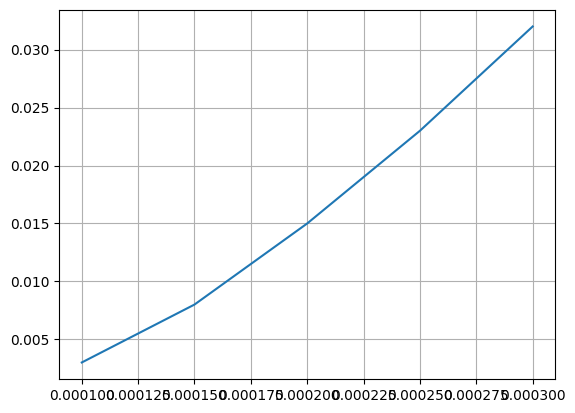

In [81]:
a = np.array([0.0001,0.00015, 0.0002, 0.00025, 0.0003])
b = np.array([0.003, 0.008, 0.015, 0.023, 0.032])
plt.plot(a, b)
plt.grid(True)
model = np.polyfit(a, b, 1)
slope = (b[0]-b[3])/(a[0]-a[3])
print(f"Slope  = {slope}")

In [82]:
G = float(input("Total Gas Flow rate in kmol/h = "))                    #100
X = float(input("kmol of Cl2/kmol of air = "))                          #0.15
nr = float(input("%Cl2 that need to be removed = "))                    #98
X2 = float(input("mole fraction of Cl2 in input water stream = "))      #0
densair = float(input("Enter density of air in lb/ft3 = ")) #0.09398
denscl2 = float(input("Enter density of Cl2 in lb/ft3 = ")) #0.1809
denswater = float(input("Enter density of water in lb/ft3 = ")) #62.42
nr = nr/100
Xf = G*X*(1-nr)
Gs = G*(1-X)
print(f"Gs,inert gas flow rate  = {Gs} kmol/h")
print(f"Xf, moles of Cl2 in outlet air stram  = {Xf} kmol of Cl2/ kmol of air")

Total Gas Flow rate in kmol/h = 100
kmol of Cl2/kmol of air = 0.15
%Cl2 that need to be removed = 98
mole fraction of Cl2 in input water stream = 0
Enter density of air in lb/ft3 = 0.09398
Enter density of Cl2 in lb/ft3 = 0.1809
Enter density of water in lb/ft3 = 62.42
Gs,inert gas flow rate  = 85.0 kmol/h
Xf, moles of Cl2 in outlet air stram  = 0.30000000000000027 kmol of Cl2/ kmol of air


In [83]:
y1 = X
Y1 = y1/(1 - y1)
Y2 = Y1*(1-nr)
x1s  = y1/slope
X1s = x1s/(1-x1s)

In [84]:
#Step - 2 : Minimum solvent flow rate determination
Lsmin = Gs*(Y1-Y2)/(X1s- X2 )
print(f"Ls,min = {Lsmin} kmol/hr")
Ls = Lsmin * 1.2

Ls,min = 13051.966666666664 kmol/hr


In [85]:
#Step - 3 :  Estimating actual solute concentration in solvent outlet
X1act = (Gs*(Y1-Y2)/Lsmin)+X2
print(f"X1 = {X1} kmol Cl2/ kmol water")

X1 = 0.0011262670504317359 kmol Cl2/ kmol water


In [86]:
#Step 4 : To find NTU : if equilibrium line is straight
Y2s = 0
Y1s = slope*X1act
NTU = ((Y1-Y2)/((Y1-Y1s)-(Y2-Y2s))/math.log((Y1-Y1s)/(Y2-Y2s)))
print(f"NTU = {NTU}")

NTU = 3.781123001292316


In [87]:
#Step 5 : Flooding velocity and operating velocity
densgas  = X*denscl2 + (1-X)*densair
denakg = densair*16.01846
denclkg = denscl2*16.01846
denswkg = 1000
densgkg = densgas*16.01846
Flv = float((Ls/G)*math.sqrt(densgkg/denswkg))
print(f"Flooding velocity = {Flv}")

Flooding velocity = 6.484791210845564


In [88]:
aa = 58
e  = 0.73
U = math.sqrt((Flv*32.2*(e**3)*62.42)/(aa*0.09398*(0.97**0.2)))
Uop = U/2
print(f"Operating velocity = {Uop} ft/s")

Operating velocity = 15.296188286795601 ft/s


In [89]:
#Step 6: Diameter of the column
P = float(input("Enter operating pressure in atm = "))
T = float(input("Enter operating Temperture in Kelvin = "))
R = 0.0821
n = G
V = n*R*T / P
print(f"Total gas flow rate is {V} m3/hr")
A = V/(Uop*1097.28)
print(f"Cross-sectional area of tower is {A} m2")
D = (math.sqrt(A*4/3.14))
print(f"Diameter of tower is {D} m")

Enter operating pressure in atm = 1
Enter operating Temperture in Kelvin = 293
Total gas flow rate is 2405.53 m3/hr
Cross-sectional area of tower is 0.14332108693931225 m2
Diameter of tower is 0.4272875297077015 m


In [90]:
#Step 7: Height of the column
HTUog = 1.24*((((G+Gs)*0.5)**0.31)/(Ls**0.25)) + (G*slope/Ls)*(Ls**0.18)
HTUog = HTUog*0.3048
H = NTU * HTUog
print(f"HTUog is {HTUog} m")
Hact = H*1.2
print(f"Height of tower is {Hact} m")
KGa = G/HTUog
print(f"KGa is {KGa} kmol/h.m3.atm")

HTUog is 1.6137628029827857 m
Height of tower is 7.322202783585805 m
KGa is 61.96697545337257 kmol/h.m3.atm
